In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('data_modified.csv')
print(data.head())

   morphology   dye   Jsc    Voc    FF  efficiency  Passivation
0           1  N719  12.7  677.0  50.0         4.3            0
1           1  Z907  17.1  450.0  47.0         3.7            0
2           1  N719  11.1  517.0  54.0         3.1            0
3           1  N719   9.5  437.0  59.0         2.4            0
4           1    N3   7.9  467.0  55.0         2.0            0


In [ ]:
data['dye'].value_counts()

In [4]:
data.columns

Index(['morphology', 'dye', 'Jsc', 'Voc', 'FF', 'efficiency', 'Passivation'], dtype='object')

In [ ]:
# Assign numeric labels starting from 1
data['dye'] = pd.factorize(data['dye'])[0] + 1
data['dye'].value_counts()

In [ ]:
columns_to_analyze = ['efficiency', 'FF', 'Voc','Jsc']
statistics = data[columns_to_analyze].describe().transpose()
#box plots
plt.figure(figsize=(16, 5))
for i, col in enumerate(columns_to_analyze, 1):
    plt.subplot(1, 4, i)
    sns.boxplot(data=data, y=col, color='lightblue')
    
    # Extract statistical values
    Q1 = data[col].quantile(0.25)
    Q2 = data[col].median()
    Q3 = data[col].quantile(0.75)
    Min = data[col].min()
    Max = data[col].max()
    
    # Annotate Q1, Q2, Q3, Min, and Max
    plt.text(0, Q1, f'Q1: {Q1:.2f}', color='blue', ha='center', va='center', fontsize=10, bbox=dict(facecolor='white', alpha=0.5))
    plt.text(0, Q2, f'Q2: {Q2:.2f}', color='green', ha='center', va='center', fontsize=10, bbox=dict(facecolor='white', alpha=0.5))
    plt.text(0, Q3, f'Q3: {Q3:.2f}', color='red', ha='center', va='center', fontsize=10, bbox=dict(facecolor='white', alpha=0.5))
    plt.text(0, Min, f'Min: {Min:.2f}', color='purple', ha='center', va='center', fontsize=10, bbox=dict(facecolor='white', alpha=0.5))
    plt.text(0, Max, f'Max: {Max:.2f}', color='orange', ha='center', va='center', fontsize=10, bbox=dict(facecolor='white', alpha=0.5))
    
    # Titles and labels
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

# Print statistical measures
print("Statistical Measures:")
print(statistics)

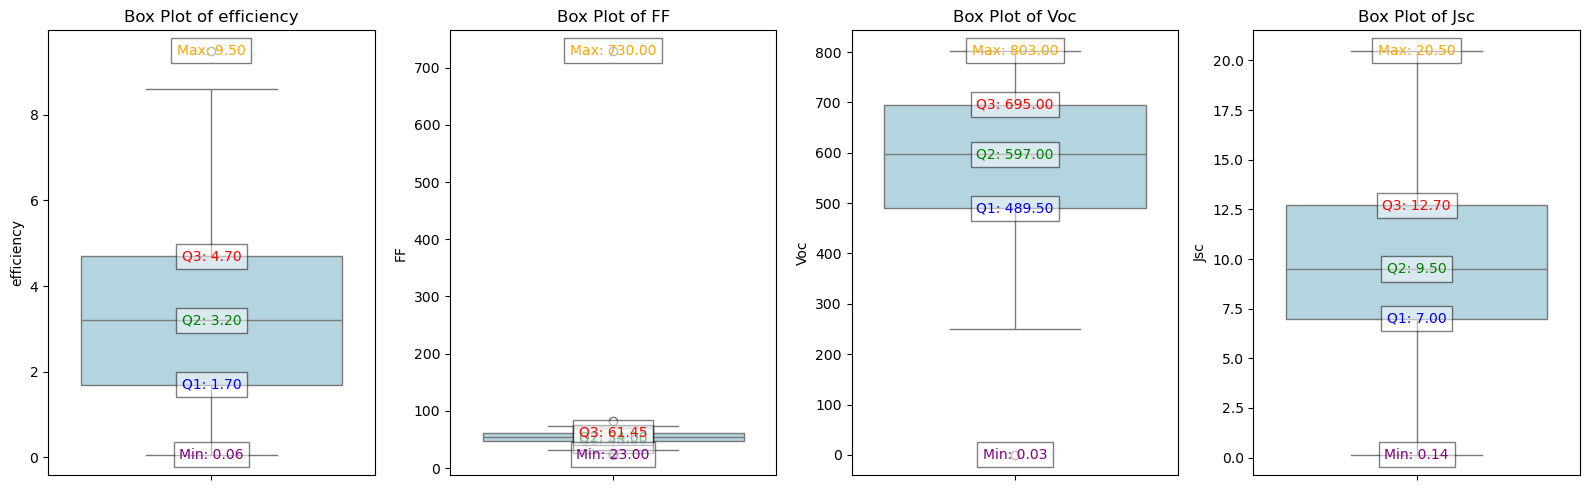

In [7]:
# Identify outliers
Q1 = data['efficiency'].quantile(0.25)
Q3 = data['efficiency'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = data[(data['efficiency'] < lower_bound) | 
                (data['efficiency'] > upper_bound)]

print("Outliers:")
print(outliers)

# Create a new DataFrame with outliers removed
data_no_outliers = data[(data['efficiency'] >= lower_bound) & 
                         (data['efficiency'] <= upper_bound)]

Outliers:
     morphology  dye   Jsc    Voc    FF  efficiency  Passivation
118           3    1  20.1  750.0  63.2         9.5            1


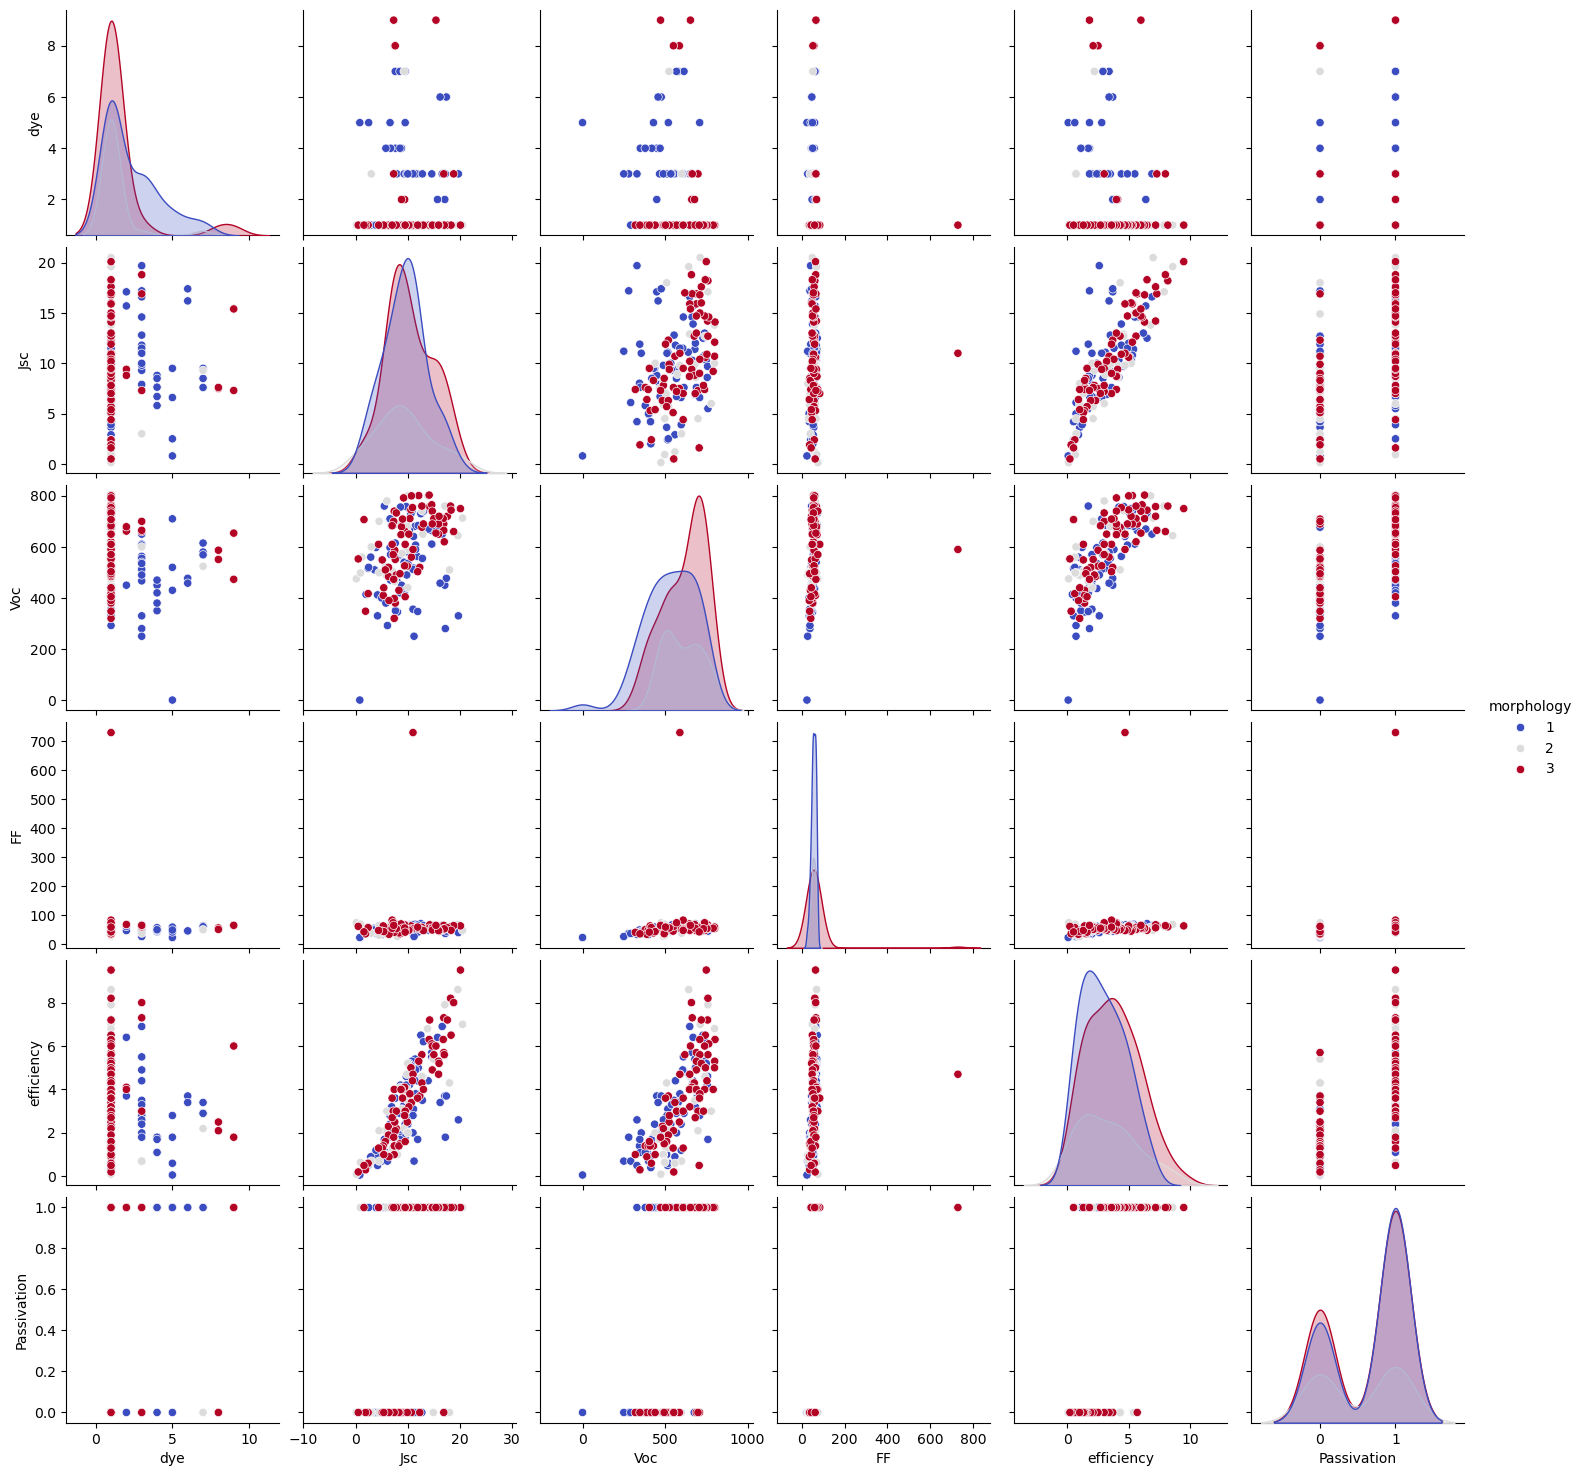

In [8]:
sns.pairplot(data,hue='morphology',palette='coolwarm')

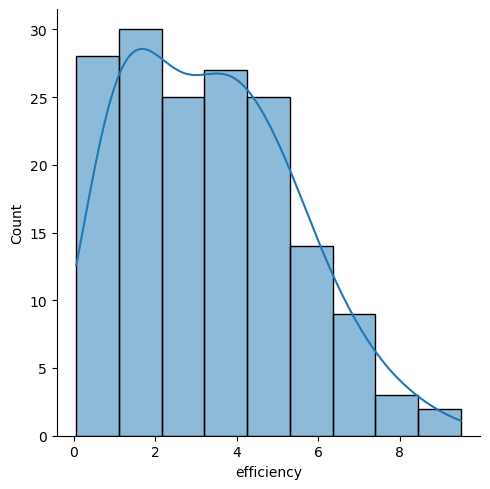

In [9]:
sns.displot(data['efficiency'], kde=True)

<Axes: >

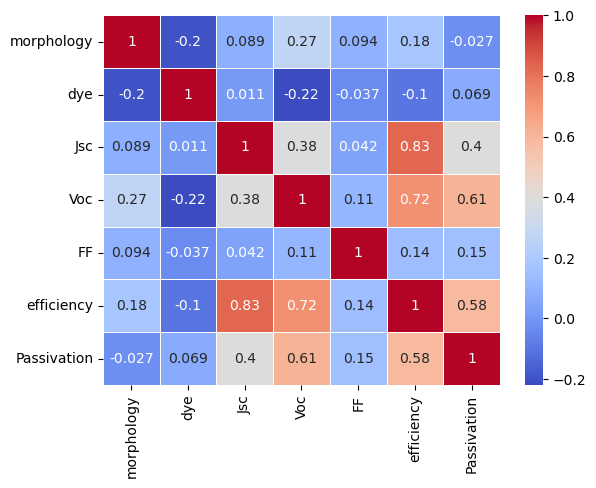

In [10]:
# remove structure to plot heatmap
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

x = data_no_outliers[['morphology', 'dye', 'Jsc', 'Voc', 'FF', 'Passivation']]
y = data_no_outliers['efficiency']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.19, random_state=101)


#scaler = StandardScaler()
#x_train = scaler.fit_transform(x_train)
#x_test = scaler.transform(x_test)



In [ ]:
print(x_train.shape)
print(x_test.shape)

Linear Regression

In [13]:
# Applying linear regression
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [14]:
print(lm.intercept_)
#print(lm.coef_)
pd.DataFrame(lm.coef_, x.columns, columns=['Coeff'])

-4.488816989612885


,Coeff
morphology,-0.023789
dye,-0.041945
Jsc,0.324827
Voc,0.004417
FF,0.040758
Passivation,0.052582


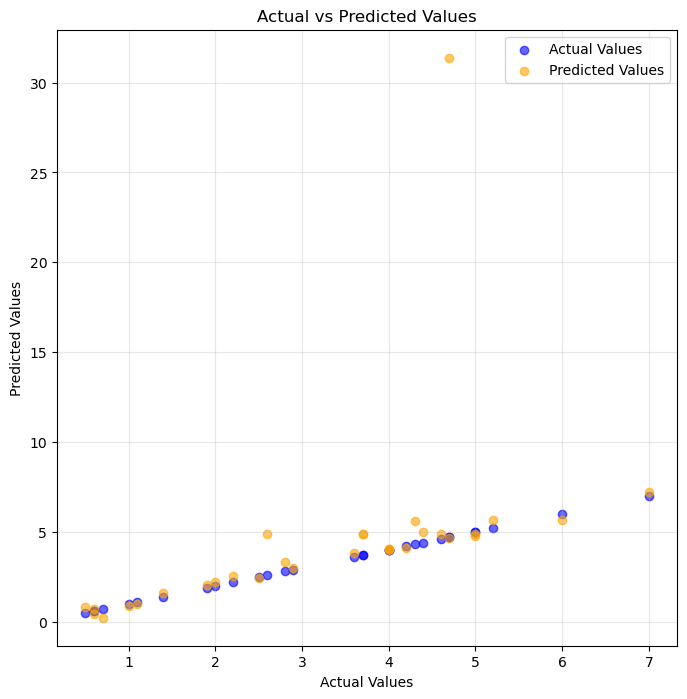

In [15]:
predictions = lm.predict(x_test)
#plt.scatter(y_test, predictions)
#sns.displot((y_test-predictions),bins=50,kde=True)

import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(8, 8))

# Scatter plot for actual values
plt.scatter(y_test, y_test, color='blue', alpha=0.6, label="Actual Values")

# Scatter plot for predicted values
plt.scatter(y_test, predictions, color='orange', alpha=0.6, label="Predicted Values")
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(alpha=0.3)
plt.show()


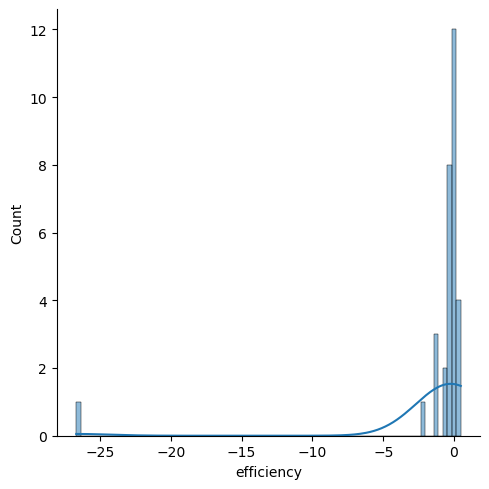

In [16]:
sns.displot((y_test-predictions),kde=True)

In [17]:
from sklearn import metrics
import numpy as np

n = x_test.shape[0]  # Number of samples
p = x_test.shape[1]  # Number of features

# Calculate metrics
r2 = metrics.r2_score(y_test, predictions)
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Print results
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R²:', r2)
print('Adjusted R²:', adjusted_r2)


MAE: 1.2345982961560344
MSE: 23.34058733407927
RMSE: 4.831209717459932
R²: -7.027336387729822
Adjusted R²: -9.034170484662278


Lasso Regression

In [18]:
from sklearn.linear_model import Lasso
lasso=Lasso()
lasso.fit(x_train,y_train)
predictions = lasso.predict(x_test)

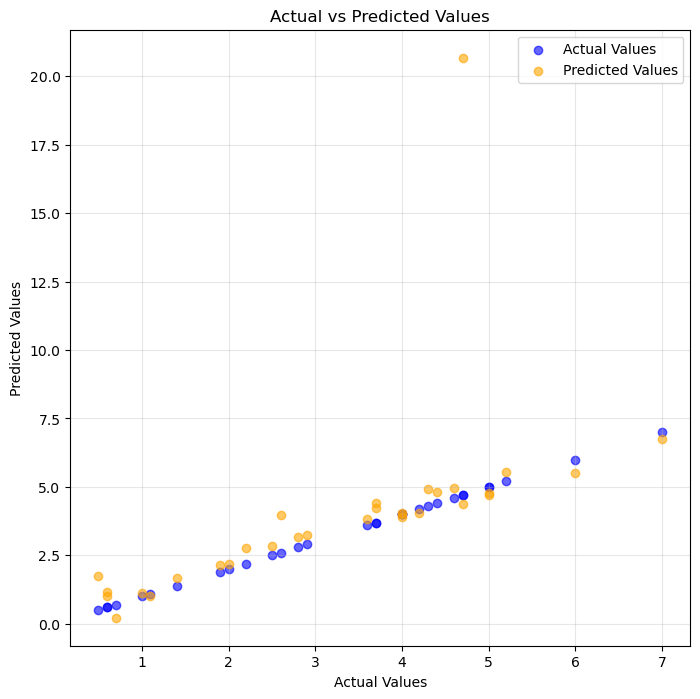

In [19]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(8, 8))

# Scatter plot for actual values
plt.scatter(y_test, y_test, color='blue', alpha=0.6, label="Actual Values")

# Scatter plot for predicted values
plt.scatter(y_test, predictions, color='orange', alpha=0.6, label="Predicted Values")
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

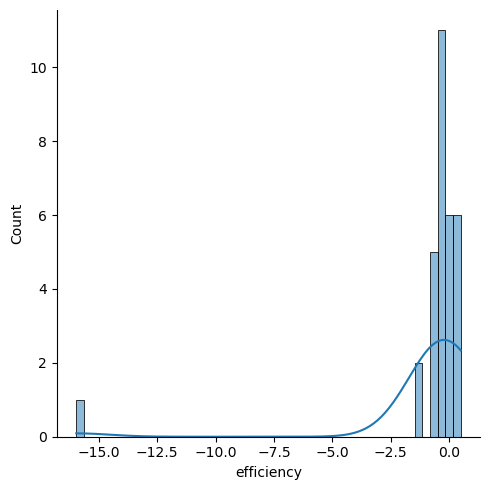

In [20]:
sns.displot((y_test-predictions),bins=50,kde=True)

In [21]:
n = x_test.shape[0]  # Number of samples
p = x_test.shape[1]  # Number of features

# Calculate metrics
r2 = metrics.r2_score(y_test, predictions)
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Print results
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R²:', r2)
print('Adjusted R²:', adjusted_r2)


MAE: 0.8980247740268112
MSE: 8.468309400220896
RMSE: 2.9100359791969748
R²: -1.9124360590401257
Adjusted R²: -2.640545073800157


ElasticNet Regression

In [22]:
from sklearn.linear_model import ElasticNet
elastic=ElasticNet()
elastic.fit(x_train,y_train)
predictions = elastic.predict(x_test)


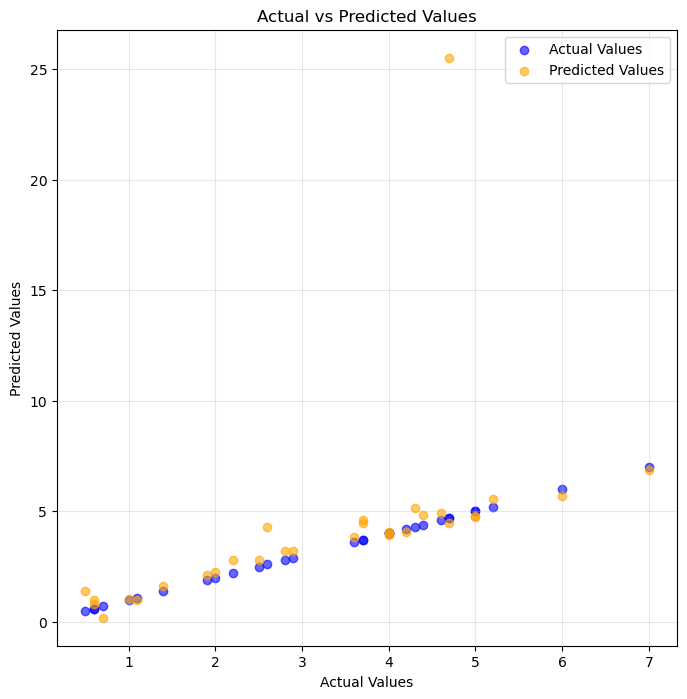

In [23]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(8, 8))

# Scatter plot for actual values
plt.scatter(y_test, y_test, color='blue', alpha=0.6, label="Actual Values")

# Scatter plot for predicted values
plt.scatter(y_test, predictions, color='orange', alpha=0.6, label="Predicted Values")
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(alpha=0.3)
plt.show()


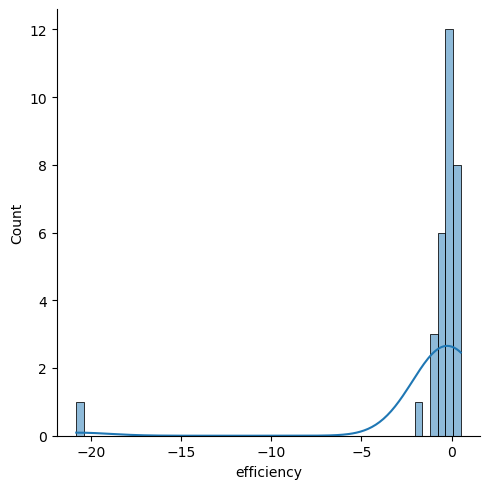

In [24]:
sns.displot((y_test-predictions),bins=50,kde=True)

In [25]:
n = x_test.shape[0]  # Number of samples
p = x_test.shape[1]  # Number of features

# Calculate metrics
r2 = metrics.r2_score(y_test, predictions)
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Print results
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R²:', r2)
print('Adjusted R²:', adjusted_r2)


MAE: 1.0432065497128318
MSE: 14.239915930104692
RMSE: 3.773581313567351
R²: -3.897417261520345
Adjusted R²: -5.121771576900431


RandomForest Regression

In [26]:
from sklearn.ensemble import RandomForestRegressor

In [27]:
# loading the model
model_2 = RandomForestRegressor()

# training the model with X_train
model_2.fit(x_train, y_train)
predictions=model_2.predict(x_test)

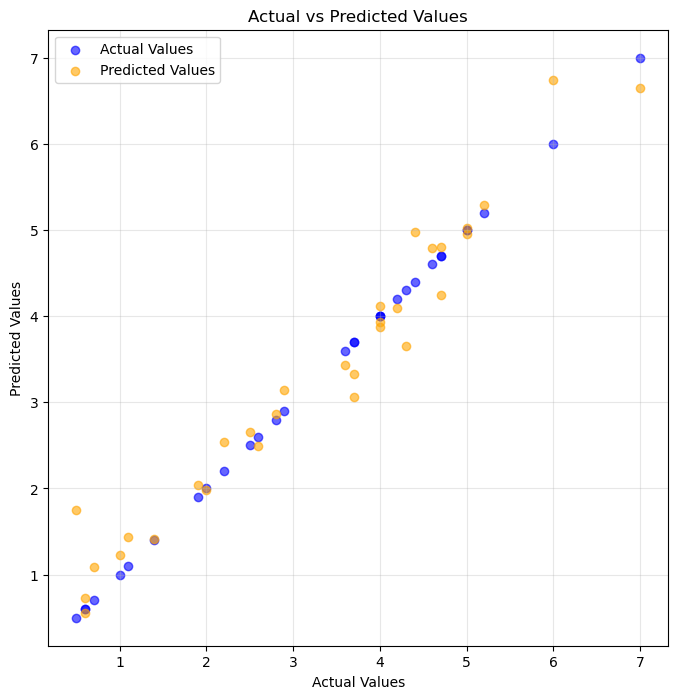

In [28]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(8, 8))

# Scatter plot for actual values
plt.scatter(y_test, y_test, color='blue', alpha=0.6, label="Actual Values")

# Scatter plot for predicted values
plt.scatter(y_test, predictions, color='orange', alpha=0.6, label="Predicted Values")
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [29]:
n = x_test.shape[0]  # Number of samples
p = x_test.shape[1]  # Number of features

# Calculate metrics
r2 = metrics.r2_score(y_test, predictions)
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Print results
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R²:', r2)
print('Adjusted R²:', adjusted_r2)


MAE: 0.2667951612903227
MSE: 0.1432184942741933
RMSE: 0.37844219409864077
R²: 0.9507440402408169
Adjusted R²: 0.9384300503010212


XGBoost Regression

In [30]:
from xgboost import XGBRegressor
model_3 = XGBRegressor()
#training the model with X_train
model_3.fit(x_train,y_train)
predictions=model_3.predict(x_test)

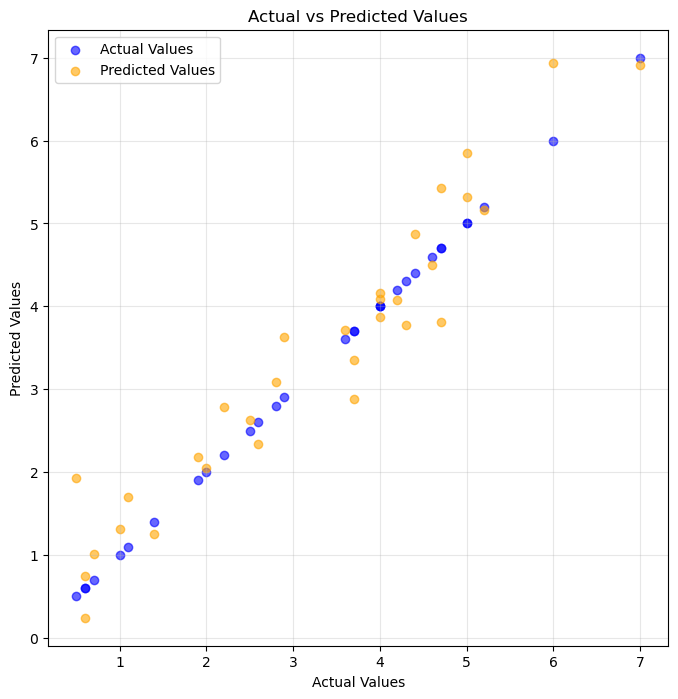

In [31]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(8, 8))

# Scatter plot for actual values
plt.scatter(y_test, y_test, color='blue', alpha=0.6, label="Actual Values")

# Scatter plot for predicted values
plt.scatter(y_test, predictions, color='orange', alpha=0.6, label="Predicted Values")
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [32]:
n = x_test.shape[0]  # Number of samples
p = x_test.shape[1]  # Number of features

# Calculate metrics
r2 = metrics.r2_score(y_test, predictions)
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Print results
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R²:', r2)
print('Adjusted R²:', adjusted_r2)


MAE: 0.3984354337376933
MSE: 0.26734340337399987
RMSE: 0.5170526118046401
R²: 0.9080547803186505
Adjusted R²: 0.8850684753983131


Testing with Own Dataset

In [36]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

new_data = pd.read_csv('test.csv')

features = ['morphology', 'dye', 'Jsc', 'Voc', 'FF', 'Passivation']
new_data_features = new_data[features]

models = [
    ("Linear Regression", lm),         
    ("Lasso Regression", lasso),        
    ("ElasticNet Regression", elastic), 
    ("Random Forest Regressor", model_2), 
    ("XGBoost Regressor", model_3),    
]

if 'efficiency' in new_data.columns:
    actual_efficiency = new_data['efficiency']
    for model_name, model in models:

        predicted_efficiency = model.predict(new_data_features)
        new_data['Predicted Efficiency'] = predicted_efficiency
        mae = mean_absolute_error(actual_efficiency, predicted_efficiency)
        mse = mean_squared_error(actual_efficiency, predicted_efficiency)
        r2 = r2_score(actual_efficiency, predicted_efficiency)
        
        comparison_df = new_data[['efficiency', 'Predicted Efficiency']]
        print(f"\nModel: {model_name}")
        print(comparison_df)
        print("\nMetrics:")
        print(f"Mean Absolute Error (MAE): {mae}")
        print(f"Mean Squared Error (MSE): {mse}")
        print(f"R² Score: {r2}")
else:

    for model_name, model in models:
        predicted_efficiency = model.predict(new_data_features)
        new_data['Predicted Efficiency'] = predicted_efficiency
        print(f"\nModel: {model_name}")
        print(new_data[['Predicted Efficiency']])



Model: Linear Regression
   efficiency  Predicted Efficiency
0       0.097              0.580123
1       0.377             -0.336634
2       0.641              0.787434
3       0.419              0.147269

Metrics:
Mean Absolute Error (MAE): 0.4037306487151869
Mean Squared Error (MSE): 0.20949071068553135
R² Score: -4.597950730118214

Model: Lasso Regression
   efficiency  Predicted Efficiency
0       0.097              0.755013
1       0.377             -0.365103
2       0.641              0.971456
3       0.419             -0.105245

Metrics:
Mean Absolute Error (MAE): 0.5637043202193264
Mean Squared Error (MSE): 0.341933084777321
R² Score: -8.137037892119661

Model: ElasticNet Regression
   efficiency  Predicted Efficiency
0       0.097              0.723142
1       0.377             -0.340790
2       0.641              0.910200
3       0.419             -0.002957

Metrics:
Mean Absolute Error (MAE): 0.5087723962201216
Mean Squared Error (MSE): 0.28944833209373905
R² Score: -6.7345

Run this cell if you're using scaled data

In [ ]:
'''import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Assuming the models and scalers (scaler_x and scaler_y) are already defined and trained

# Load the test dataset
new_data = pd.read_csv('test.csv')

# Select the features used for training
features = ['morphology', 'dye', 'Jsc', 'Voc', 'FF', 'Passivation']
new_data_features = new_data[features]

# Apply the same scaling to the features as was done for the training data
new_data_features_scaled = scaler.transform(new_data_features)

# List of pre-trained models
models = [
    ("Linear Regression", lm),          # Pre-trained Linear Regression model
    ("Lasso Regression", lasso),        # Pre-trained Lasso Regression model
    ("ElasticNet Regression", elastic), # Pre-trained ElasticNet model
    ("Random Forest Regressor", model_2), # Pre-trained Random Forest model
    ("XGBoost Regressor", model_3),     # Pre-trained XGBoost model

]

# If the dataset also has the actual efficiency values for comparison
if 'efficiency' in new_data.columns:
    actual_efficiency = new_data['efficiency']

    # Iterate through each model
    for model_name, model in models:
        # Predict efficiency using the trained model (on scaled data)
        predicted_efficiency = model.predict(new_data_features_scaled)
        
        # Add predicted efficiency to the dataframe
        new_data['Predicted Efficiency'] = predicted_efficiency
        
        # Calculate evaluation metrics
        mae = mean_absolute_error(actual_efficiency, predicted_efficiency)
        mse = mean_squared_error(actual_efficiency, predicted_efficiency)
        r2 = r2_score(actual_efficiency, predicted_efficiency)
        
        # Print comparison and metrics for each model
        comparison_df = new_data[['efficiency', 'Predicted Efficiency']]
        print(f"\nModel: {model_name}")
        print(comparison_df)
        print("\nMetrics:")
        print(f"Mean Absolute Error (MAE): {mae}")
        print(f"Mean Squared Error (MSE): {mse}")
        print(f"R² Score: {r2}")
else:
    # If no actual efficiency is available, print only the predictions for each model
    for model_name, model in models:
        predicted_efficiency = model.predict(new_data_features_scaled)
        new_data['Predicted Efficiency'] = predicted_efficiency
        print(f"\nModel: {model_name}")
        print(new_data[['Predicted Efficiency']])'''
